In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
import torch
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#from gensim.models import Word2Vec

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#from gensim.models import Word2Vec
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [3]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#pip install --upgrade scipy
#import torch
#torch.__version__
#!pip install missingno
#!pip install torch torchvision torchaudio transformers

#!python.exe -m pip install --upgrade pip

# Importing Dataset 

In [ ]:
df1  = pd.read_csv(r"C:\Users\Downloads/fulldata11.csv")
df1.sample(20)

,Unnamed: 0,text,category,date,title,author
694,694,An apology for the East-India Company with an ...,book.xml,1690,An-apology-for-the-East-India-Company,william-atwood
38,38,Hier begynneth the booke callyd the Myrrour of...,book.xml,1490,Hier-begynneth-the-booke-callyd-the-Myrrour-of...,williamm-caxton
172,172,The hye way to the spyttell hous Copland and t...,book.xml,1536,The-hye-way-to-the-spyttell-hous-Copland-and-t...,Robert-copland
86,86,Kynge Appolyn of Thyre.Apollonius. English1510...,book.xml,1510,kynge-appolyn-of-thyre,robert-copland
552,552,Evgenia's teares for Great Brittaynes distract...,book.xml,1642,Evgenia's-teares-for-Great-Brittaynes-distract...,edward-reynolds
54,54,Here begynneth a lytell treatyse or booke name...,treaty.xml,1499,Here-begynneth-a-lytell-treatyse-or-booke-name...,Sir-John-mandeville
175,175,The golden boke of Marcus Aurelius Emperour an...,book.xml,1537,The-golden-boke-of-Marcus-Aurelius-Emperour-an...,john-bourchier-berners
1030,1030,The sufferings of the family of Ortenberg. A n...,novel.xml,1800,The-sufferings-of-the-family-of-Ortenberg,august-von-kotzebue
598,598,Observations on the historie of The reign of K...,book.xml,1656,Observations-on-the-historie-of-The-reign-of-K...,peter-heylyn
863,863,Seasonable thoughts on the state of religion i...,Book.xml,1743,Seasonable-thoughts-on-the-state-of-religion-i...,Chauncy-Charles


In [ ]:
df2 = pd.read_csv(r"C:\Users\Downloads/fulldata12.csv")


# cleaning df2

In [6]:
import pandas as pd
import re

# Example DataFrame df2 for demonstration
# df2 = pd.DataFrame({'text': ['01:  3,16\'  !| old Gentleman\'s days were comfortably spent. ...']})

# Function to clean the text
def clean_text(text):
    # Remove patterns such as numbers followed by a colon, e.g., "01:", "101:"
    text = re.sub(r'\d+:\s+', '', text)
    
    # Remove inline markers like "$4$", "$SS#ZI$", "$SS#D$", etc.
    text = re.sub(r'\$[\w#\*%]+|\d+\#?\d*|\*', '', text)
    
    # Remove other unnecessary symbols like "~", "|", "@", etc.
    text = re.sub(r'[~!|@\'\^]', '', text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the clean_text function to each row in the 'text' column of the DataFrame
df2['text'] = df2['text'].apply(clean_text)

# Save the cleaned DataFrame to a new DataFrame df3
df3 = df2.copy()

# Display the new DataFrame with the cleaned text
#print(df3['text'][0])



In [7]:
#df['text'] = df['text'].replace('ſ', 's', regex=True)
#df['text'] = df['text'].replace('<BOS>', ' ', regex=True)
#df['text'] = df['text'].replace("[^a-zA-Z0-9 ']", ' ', regex=True)
#df['text'] = df['text'].replace("@", ' ', regex=True)

# Combining both the xml and txt  data frames

In [8]:
# Concatenate df1 and df3
df = pd.concat([df1, df3], ignore_index=True)

# Display the first few rows of the combined DataFrame
df.head()

,Unnamed: 0,text,category,date,title,author
0,0,hEre begynneth the volume intituled and named ...,book.xml,1473,hEre-begynneth-the-volume-intituled-and-named-...,william-caxton
1,1,hEre begynneth the volume intituled and named ...,book.xml,1473,history-of-troy,william-caxton
2,2,"[T]o the right noble, right excellent [and] ve...",book.xml,1474,vertuous-prince-George-duc-of-Clarence-Erle-of...,william-caxton
3,3,Hic incipit paruus CathoCatonis disticha. Engl...,book.xml,1476,Hic-incipit-paruus-Catho,burgh-benedict
4,4,The Canterbury TalesUniversity of Oxford Text ...,book.xml,1476,The-Canterbury-Tales,Chaucer-Geoffrey


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1263 non-null   int64 
 1   text        1263 non-null   object
 2   category    1263 non-null   object
 3   date        1263 non-null   int64 
 4   title       1263 non-null   object
 5   author      1263 non-null   object
dtypes: int64(2), object(4)
memory usage: 59.3+ KB


# Checking for missing values

<Axes: >

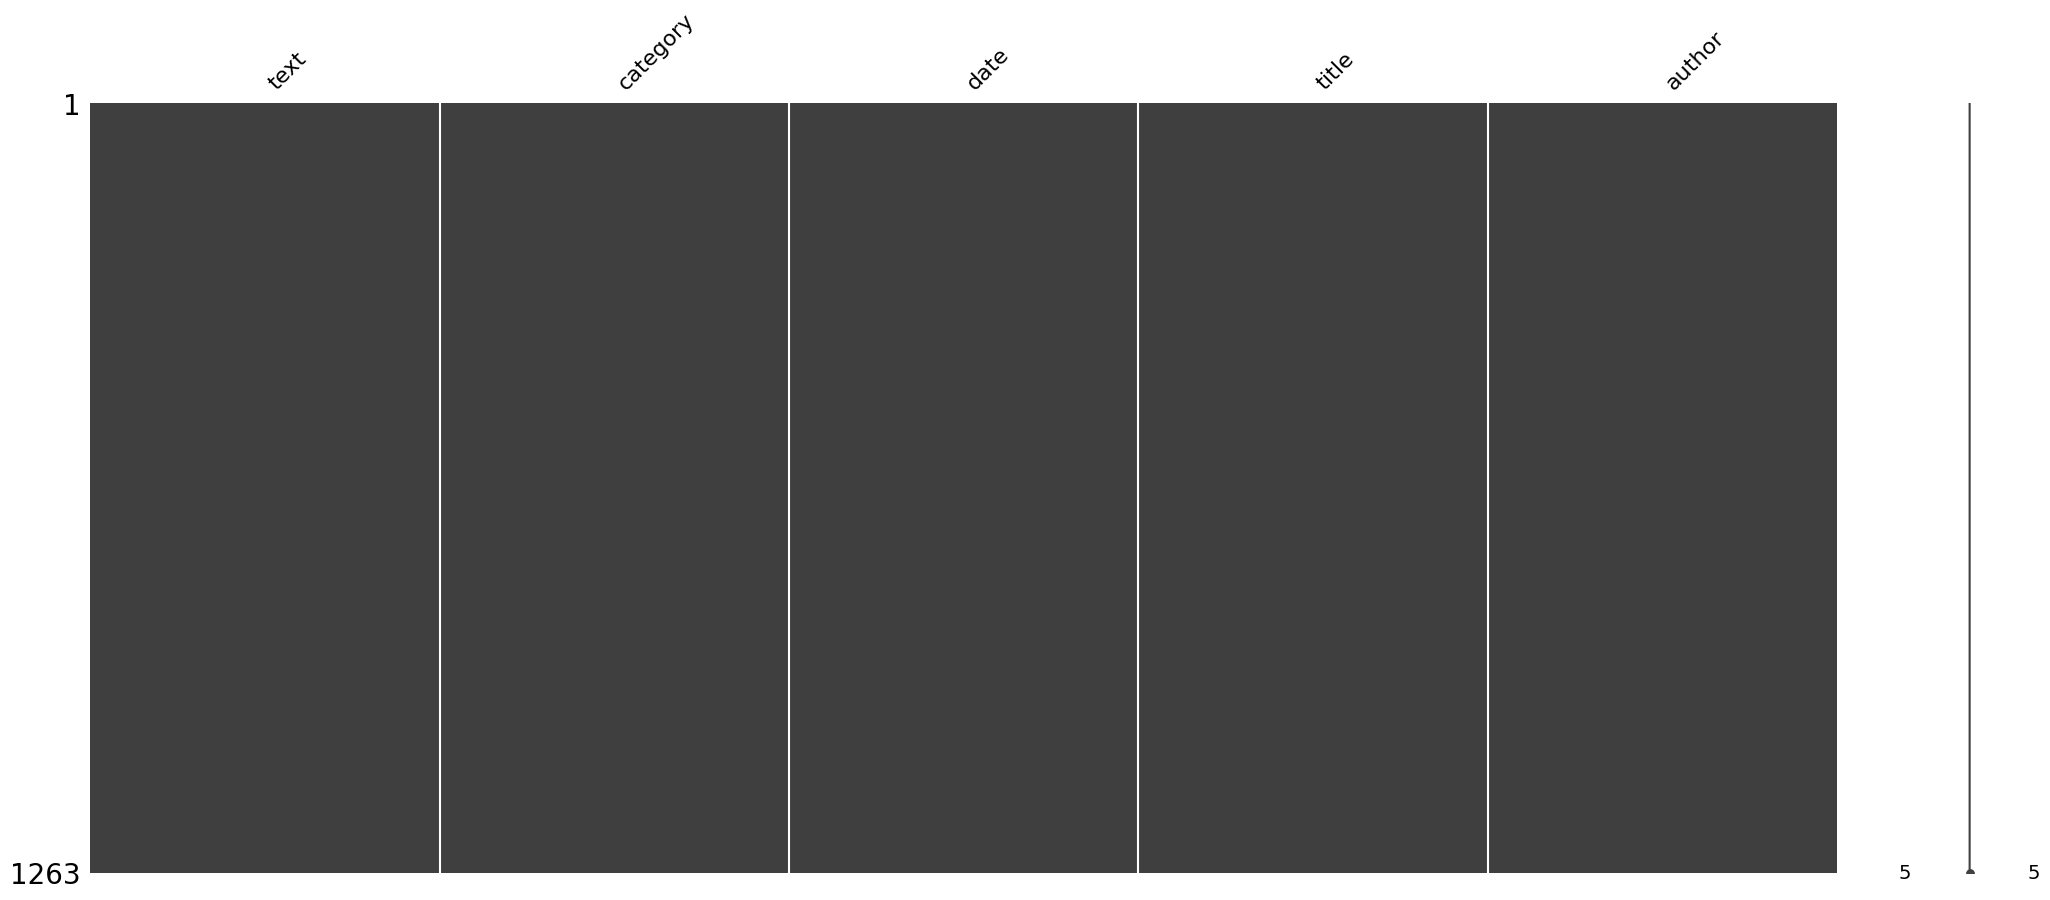

In [10]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
msno.matrix(df)

In [11]:
df.dropna(inplace=True)

# Removing all non-alphanumeric characters followed by other errors in the text

In [12]:
df['text'] = df['text'].replace('ſ', 's', regex=True)
df['text'] = df['text'].replace('<BOS>', ' ', regex=True)
df['text'] = df['text'].replace("[^a-zA-Z0-9 ']", ' ', regex=True)
df['text'] = df['text'].replace("@", ' ', regex=True)
df['text'] = df['text'].replace("EOS", ' ', regex=True)

In [13]:
#df['text'] = df['text'].replace("haue", ' ', regex=True)
#df['text'] = df['text'].replace("vnto", ' ', regex=True)

# Splitting the years into decades and restricting them to the range from 1470 to 1930

In [14]:
df['date'] = pd.to_numeric(df['date'], errors='coerce', downcast='integer')
#df['decade'] = (df['date'] // 10) * 10
df['decade'] = (df['date'] // 10) * 10

In [15]:
#df = df[(df["decade"] >= 1500) & (df["decade"] < 1920)]


In [16]:
# Splitting the text into multiple sections for books that have a lot of data

def split_rows_based_on_word_count(df, column_name, word_count_threshold):
    new_rows = []

    for index, row in df.iterrows():
        text = row[column_name]
        words = text.split()
        
        if len(words) > word_count_threshold:
            # Split the text into multiple rows
            split_texts = [words[i:i+word_count_threshold] for i in range(0, len(words), word_count_threshold)]
            
            for split_text in split_texts:
                new_row = row.copy()
                new_row[column_name] = ' '.join(split_text)
                new_rows.append(new_row)
        else:
            # Keep the row as it is
            new_rows.append(row)

    return pd.DataFrame(new_rows, columns=df.columns)


word_count_threshold = 512  # Set your desired word count threshold
df = split_rows_based_on_word_count(df, 'text', word_count_threshold)

# Now, 'new_dataframe' contains the rows split based on the word count threshold


# Threshold of 2000 samples per decade 

In [17]:
threshold = 2000
df = df.groupby('decade').head(threshold)
print(df)

                                                   text  category  date  \
0     hEre begynneth the volume intituled and named ...  book.xml  1473   
0     O P A I K L A K In three books The first leaf ...  book.xml  1473   
0     will never have been looked at by a TCP editor...  book.xml  1473   
0     quayersleyda partandin two yere aftyrlabouredn...  book.xml  1473   
0     Iupiter andof the begynnyngandcomyng vp of Tro...  book.xml  1473   
...                                                 ...       ...   ...   
1254  Yet I was disturbed to learn the facts and hav...  book.txt  1921   
1254  do not know whe ther my mother is still alive ...  book.txt  1921   
1254  a teacher of the Law Have you forgotten this b...  book.txt  1921   
1254  him ask whether someone might be hiding her fr...  book.txt  1921   
1255  BC THE ECLOGUES by Virgil ECLOGUE I MELIBOEUS ...  book.txt  1921   

                                                  title            author  \
0     hEre-begynneth-t

In [18]:
df.sample(10)

,text,category,date,title,author,decade
1234,no less at the generosity of Rebecca by which ...,book.txt,1820,ivanhoe,Scott-walter,1820
511,aches cleane my head in peeces let my hart reu...,book.xml,1632,The-sweete-thoughts-of-death,henry-hawkins,1630
893,the Earth and Sea The next Thing I shall proce...,Book.xml,1753,The-American-instructor-or-Young-mans-best-com...,Fisher-Georger,1750
505,Oecolampadius Bibliander Beza Castalio Tremeli...,book.xml,1630,The-triall-of-the-protestant-priuate-spirit-VV...,james-sharpe,1630
620,is described by him to have departed out of th...,book.xml,1664,Romish-doctrines-not-from-the-beginning,daniel-whitby,1660
67,partes Of the whiche the fyrst parte conteyned...,book.xml,1502,Tabula,Ranulf-Higden,1500
1004,through which meanders the head branch of the ...,Book.xml,1791,Travels-through-North-&-South-Carolina-Georgia...,Bartram-William,1790
1119,word without asking mamma If he had been good ...,book.xml,1874,Lady-Anna,anthony-trollope,1870
770,to Assert the Right and Power of Parliaments A...,Book.xml,1712,A-collection-of-original-papers-and-material-t...,Defoe-Daniel,1710
593,to preserve greatRome Virg I accept your ch in...,book.xml,1654,Appius-and-Virginia-a-tragedy,john-webster,1650


In [19]:
#for i in df['text'][100]:
    #print(i)

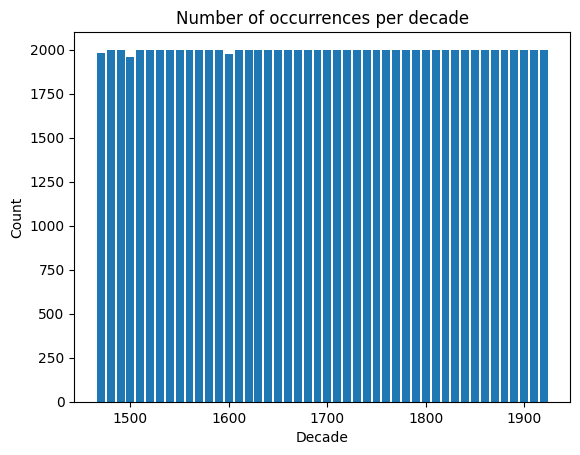

In [20]:
# Visualizing according to number of rows per decade to better understand the data distribution
decade_counts = df['decade'].value_counts().sort_index()

# Create a bar graph
plt.bar(decade_counts.index, decade_counts.values, width=8)  # Adjust the width as needed

# Set labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Number of occurrences per decade')

# Display the graph
plt.show()


In [21]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91920 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      91920 non-null  object
 1   category  91920 non-null  object
 2   date      91920 non-null  int64 
 3   title     91920 non-null  object
 4   author    91920 non-null  object
 5   decade    91920 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


# Linear regression model with TF IDF

In [19]:

texts = df['text']
years = df['date']

In [20]:

vectorizer = TfidfVectorizer(max_features=15000)  # Limit the number of features for simplicity
X = vectorizer.fit_transform(texts)


X_train, X_test, y_train, y_test = train_test_split(X, years, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 905.382430709056
R^2 Score: 0.9475747349242934


# Word2 vec with linear regression

Train RMSE: 72.72719581563244
Test RMSE: 73.0881568250492
Train MAE: 56.70429631151166
Test MAE: 57.000780782211095
Train R2 Score: 0.6984160754006433
Test R2 Score: 0.6919117920337079


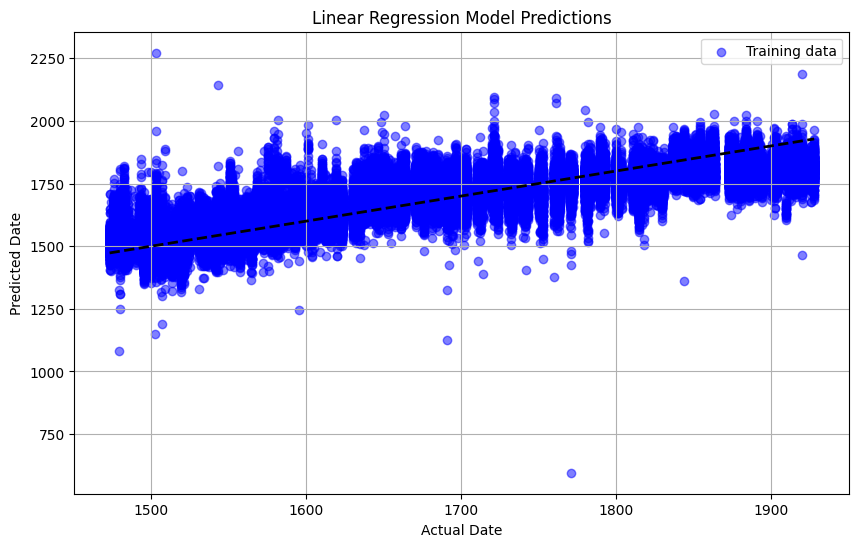

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Convert text data to Word2Vec features
word2vec_model = Word2Vec(sentences=train_data, vector_size=500, window=10, min_count=1, workers=50)
word2vec_model.train(train_data, total_examples=len(train_data), epochs=10)
word_vectors = word2vec_model.wv
vocabulary = set(word_vectors.key_to_index)

# Function to average word vectors for a sentence
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0
    for word in words:
        if word in vocabulary:
            nwords += 1
            feature_vector = np.add(feature_vector, model[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Function to generate word vectors for each sentence
def wordvec_features(X, model, vocabulary, num_features):
    features = [average_word_vectors(words, model, vocabulary, num_features)
                for words in X if words]
    return np.array(features)

# Transform text data to Word2Vec features
train_text_features = wordvec_features(train_data, word_vectors, vocabulary, 500)
test_text_features = wordvec_features(test_data, word_vectors, vocabulary, 500)

# Train Linear Regression model
model = LinearRegression()
model.fit(train_text_features, train_labels)

# Predictions
train_predictions = model.predict(train_text_features)
test_predictions = model.predict(test_text_features)

# Calculate RMSE, MAE, and R2 Score
train_rmse = sqrt(mean_squared_error(train_labels, train_predictions))
test_rmse = sqrt(mean_squared_error(test_labels, test_predictions))
train_mae = mean_absolute_error(train_labels, train_predictions)
test_mae = mean_absolute_error(test_labels, test_predictions)
train_r2 = r2_score(train_labels, train_predictions)
test_r2 = r2_score(test_labels, test_predictions)

# Output the evaluation metrics
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(train_labels, train_predictions, color='blue', label='Training data', alpha=0.5)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2)
plt.title('Linear Regression Model Predictions')
plt.xlabel('Actual Date')
plt.ylabel('Predicted Date')
plt.grid(True)
plt.legend()
plt.show()


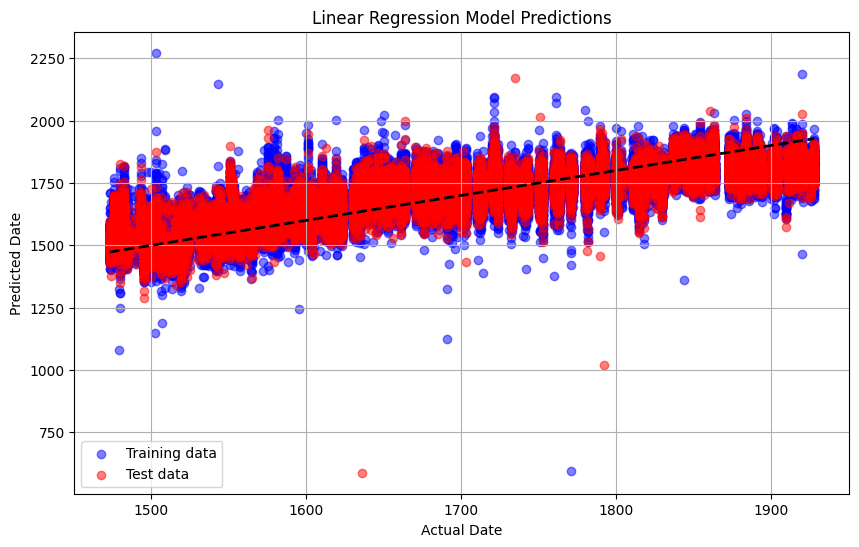

In [66]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(train_labels, train_predictions, color='blue', label='Training data', alpha=0.5)

# Plot test data
plt.scatter(test_labels, test_predictions, color='red', label='Test data', alpha=0.5)

# Plot the line representing perfect predictions
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2)

# Titles and labels
plt.title('Linear Regression Model Predictions')
plt.xlabel('Actual Date')
plt.ylabel('Predicted Date')

# Grid, legend, and display
plt.grid(True)
plt.legend()
plt.show()

In [25]:
torch.cuda.is_available()

False

In [19]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


# DistilBERT 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Load pre-trained model and tokenizer
model_name = "distilbert-base-uncased"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)  # Regression with one output label

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenize the text data
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               train_labels_tensor)

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              test_labels_tensor)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training
model.train()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)

for epoch in range(10):  
    print('epoch')
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_distilbert = sqrt(mean_squared_error(test_labels, predictions))


# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_distilbert = sqrt(mean_squared_error(test_labels, predictions))


from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

In [ ]:

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R2): 0.9908547743419884
Mean Absolute Error (MAE): 7.604016837883435


In [22]:
model_save_path = "D:/trained_models/distilbert_regression"
tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

# Distil Bert With loss per epoch graph 12 epoch

In [ ]:
import torch
import numpy as np
from transformers import AdamW, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import matplotlib.pyplot as plt


train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Initialize tokenizer and model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)


# Tokenization
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               torch.tensor(train_labels_scaled, dtype=torch.float32).to(device))

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              torch.tensor(test_labels_scaled, dtype=torch.float32).to(device))

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)


losses = []
maes = []  
rmses = [] 
model.train()
for epoch in range(12):  
    #print('epoch')
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)
    print(f"Epoch {epoch + 1}: Loss = {average_loss}")

    # MAE and RMSE at the end of each epoch
    model.eval()
    epoch_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.squeeze(1)
            epoch_predictions.extend(preds.cpu().numpy())

    predictions_scaled = scaler.inverse_transform(np.array(epoch_predictions).reshape(-1, 1)).flatten()
    epoch_mae = mean_absolute_error(test_labels, predictions_scaled)
    epoch_rmse = sqrt(mean_squared_error(test_labels, predictions_scaled))
    maes.append(epoch_mae)
    rmses.append(epoch_rmse)
    model.train()  



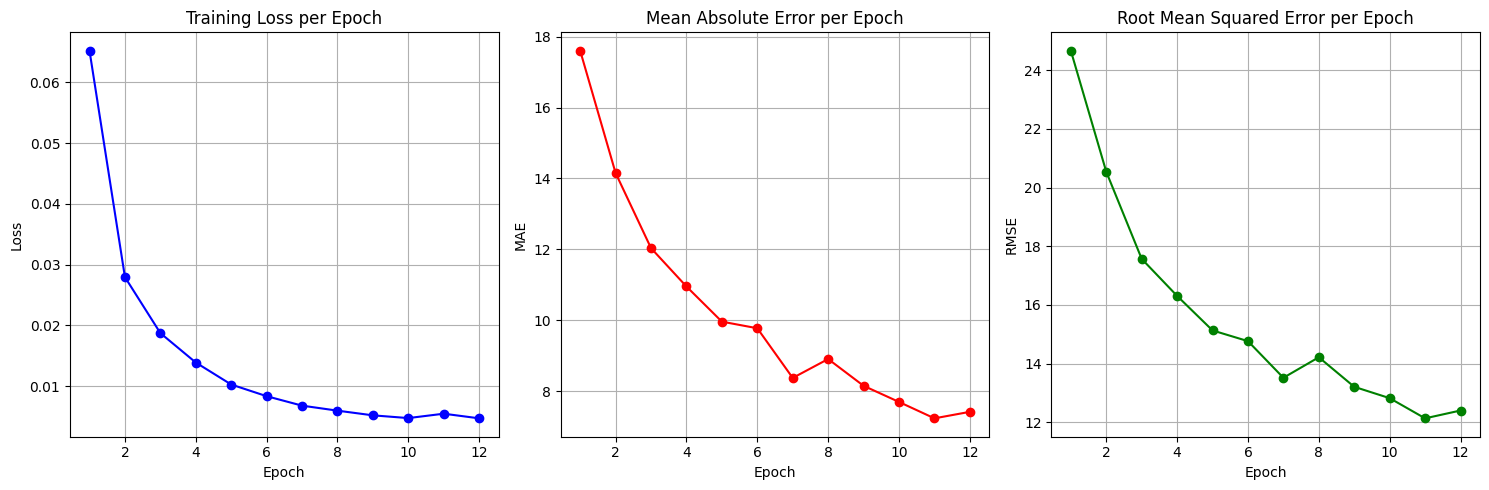

In [17]:
# Plotting the training loss, MAE, and RMSE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 13), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, 13), maes, marker='o', linestyle='-', color='red')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, 13), rmses, marker='o', linestyle='-', color='green')
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()



In [19]:
# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_distilbert = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse_distilbert}")



# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 12.399767309265119
R-squared (R2): 0.991008225467854
Mean Absolute Error (MAE): 7.421244498390714


# Distil bert 15 epoch with charts

In [ ]:
import torch
import numpy as np
from transformers import AdamW, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import matplotlib.pyplot as plt


# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Initialize tokenizer and model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)


# Tokenization
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               torch.tensor(train_labels_scaled, dtype=torch.float32).to(device))

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              torch.tensor(test_labels_scaled, dtype=torch.float32).to(device))

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training with loss tracking
losses = []
maes = []  
rmses = [] 
model.train()
for epoch in range(15):  
    print('epoch')
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)
    print(f"Epoch {epoch + 1}: Loss = {average_loss}")

    # Evaluate MAE and RMSE at the end of each epoch
    model.eval()
    epoch_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.squeeze(1)
            epoch_predictions.extend(preds.cpu().numpy())

    predictions_scaled = scaler.inverse_transform(np.array(epoch_predictions).reshape(-1, 1)).flatten()
    epoch_mae = mean_absolute_error(test_labels, predictions_scaled)
    epoch_rmse = sqrt(mean_squared_error(test_labels, predictions_scaled))
    maes.append(epoch_mae)
    rmses.append(epoch_rmse)
    model.train()  


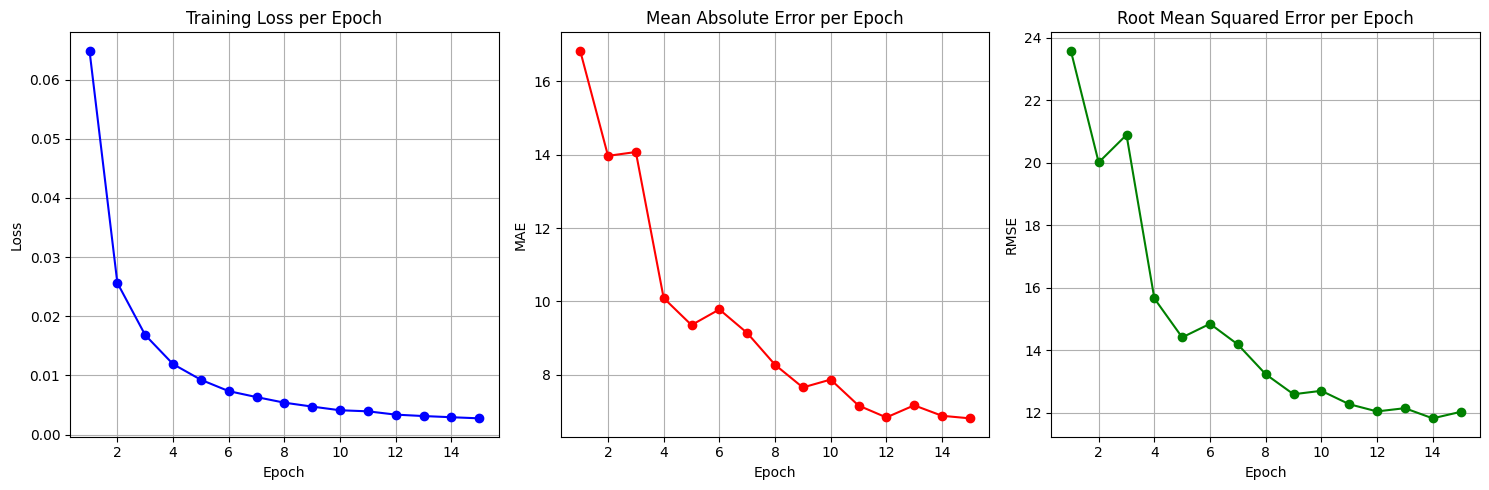

In [23]:
# Plotting the training loss, MAE, and RMSE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 16), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, 16), maes, marker='o', linestyle='-', color='red')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, 16), rmses, marker='o', linestyle='-', color='green')
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_distilbert = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse_distilbert}")


# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 12.02222558763975
R-squared (R2): 0.9916641325088833
Mean Absolute Error (MAE): 6.81032862127833


# De BERTa 10 epoch

In [ ]:

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import numpy as np
import pandas as pd

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Load pre-trained model and tokenizer
model_name = "distilbert/distilroberta-base"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)  

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenize the text data
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               train_labels_tensor)

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              test_labels_tensor)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training
model.train()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)

for epoch in range(10): 
    print('epoch')
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        


In [17]:
# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Calculate metrics
rmse_deberta = sqrt(mean_squared_error(test_labels, predictions))
r_squared = r2_score(test_labels, predictions)
mae = mean_absolute_error(test_labels, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse_deberta}")
print(f"R-squared (R2): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")



Root Mean Squared Error (RMSE): 14.097421146998833
R-squared (R2): 0.9883775500180537
Mean Absolute Error (MAE): 9.190678887183775


# Deberta 15 epochs

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np
import pandas as pd

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Load pre-trained model and tokenizer
model_name = "distilbert/distilroberta-base"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)  

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenize the text data
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               train_labels_tensor)

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              test_labels_tensor)

# Create DataLoader for test dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training with loss tracking
losses_Deberta = []
maes_Deberta = []  
rmses_Deberta = [] 
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)

model.train()
for epoch in range(15):  
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses_Deberta.append(average_loss)
    print(f"Epoch {epoch + 1}: Loss = {average_loss}")

    # Evaluate MAE and RMSE at the end of each epoch
    model.eval()
    epoch_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.squeeze(1)
            epoch_predictions.extend(preds.cpu().numpy())

    predictions_scaled = scaler.inverse_transform(np.array(epoch_predictions).reshape(-1, 1)).flatten()
    epoch_mae = mean_absolute_error(test_labels, predictions_scaled)
    epoch_rmse = sqrt(mean_squared_error(test_labels, predictions_scaled))
    maes_Deberta.append(epoch_mae)
    rmses_Deberta.append(epoch_rmse)
    print(f"Epoch {epoch + 1}: MAE = {epoch_mae}, RMSE = {epoch_rmse}")
    model.train()  


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Calculate metrics
rmse_deberta = sqrt(mean_squared_error(test_labels, predictions))
r_squared = r2_score(test_labels, predictions)
mae = mean_absolute_error(test_labels, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse_deberta}")
print(f"R-squared (R2): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")




Root Mean Squared Error (RMSE): 13.185903705166492
R-squared (R2): 0.9899723110005333
Mean Absolute Error (MAE): 9.297652527743116


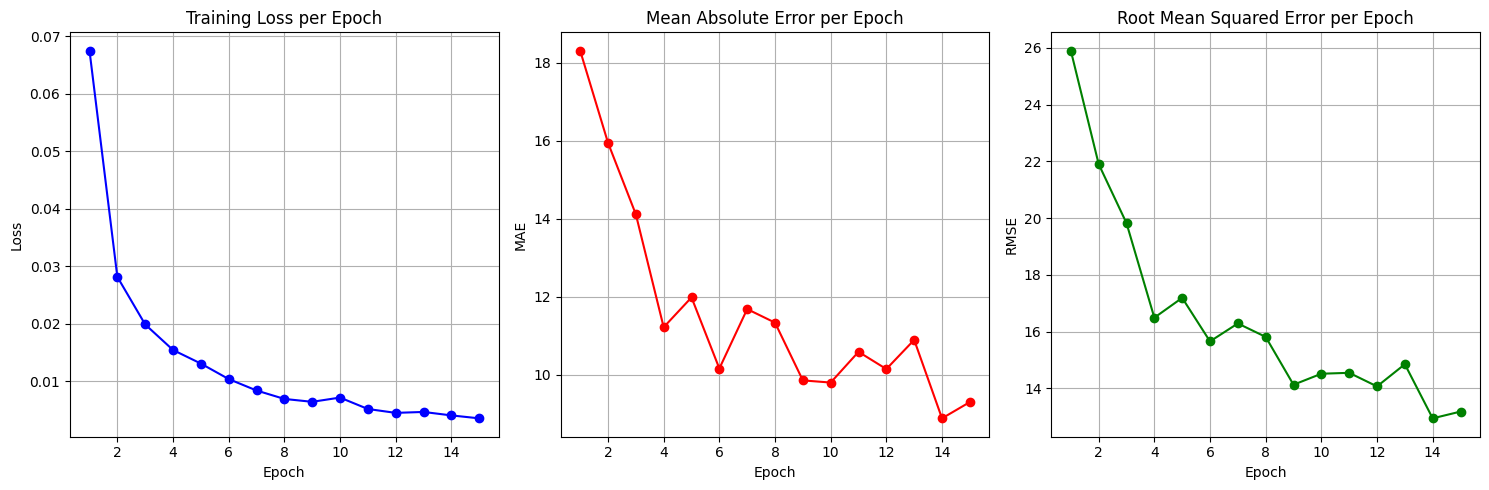

In [26]:
# Plotting the training loss, MAE, and RMSE
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(losses_Deberta) + 1), losses_Deberta, marker='o', linestyle='-', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(maes_Deberta) + 1), maes_Deberta, marker='o', linestyle='-', color='red')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, len(rmses_Deberta) + 1), rmses_Deberta, marker='o', linestyle='-', color='green')
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# BERT 10 EPOCH

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import numpy as np
import pandas as pd

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Load pre-trained model and tokenizer
model_name = "google-bert/bert-base-uncased"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)  

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenize the text data
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert labels to tensors
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

# Convert data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(torch.tensor(train_encodings['input_ids']).to(device),
                                               torch.tensor(train_encodings['attention_mask']).to(device),
                                               train_labels_tensor)

test_dataset = torch.utils.data.TensorDataset(torch.tensor(test_encodings['input_ids']).to(device),
                                              torch.tensor(test_encodings['attention_mask']).to(device),
                                              test_labels_tensor)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training
model.train()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20, shuffle=True)

for epoch in range(10):  
    print('epoch')
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()


In [17]:
# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Calculate metrics
rmse_deberta = sqrt(mean_squared_error(test_labels, predictions))
r_squared = r2_score(test_labels, predictions)
mae = mean_absolute_error(test_labels, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse_deberta}")
print(f"R-squared (R2): {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 11.46436298854178
R-squared (R2): 0.9923136847211352
Mean Absolute Error (MAE): 7.63320475839208


# Bert with 15 EPOCH

In [ ]:
import torch
import numpy as np
from transformers import AdamW, BertTokenizer, BertForSequenceClassification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Initialize tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenization
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True, max_length=512)

#  data to PyTorch tensors
train_input_ids = torch.tensor(train_encodings['input_ids']).to(device)
train_attention_mask = torch.tensor(train_encodings['attention_mask']).to(device)
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)

test_input_ids = torch.tensor(test_encodings['input_ids']).to(device)
test_attention_mask = torch.tensor(test_encodings['attention_mask']).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

train_dataset = torch.utils.data.TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = torch.utils.data.TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training with loss tracking
losses = []
maes = [] 
rmses = [] 
model.train()
for epoch in range(15):  
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)
    print(f"Epoch {epoch + 1}: Loss = {average_loss}")

    # Evaluate MAE and RMSE at the end of each epoch
    model.eval()
    epoch_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.squeeze(1)
            epoch_predictions.extend(preds.cpu().numpy())

    predictions_scaled = scaler.inverse_transform(np.array(epoch_predictions).reshape(-1, 1)).flatten()
    epoch_mae = mean_absolute_error(test_labels, predictions_scaled)
    epoch_rmse = sqrt(mean_squared_error(test_labels, predictions_scaled))
    maes.append(epoch_mae)
    rmses.append(epoch_rmse)
    model.train() 


In [23]:
# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_bert = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse_bert}")

# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 11.986577485627626
R-squared (R2): 0.9917134939667552
Mean Absolute Error (MAE): 7.353938600910367


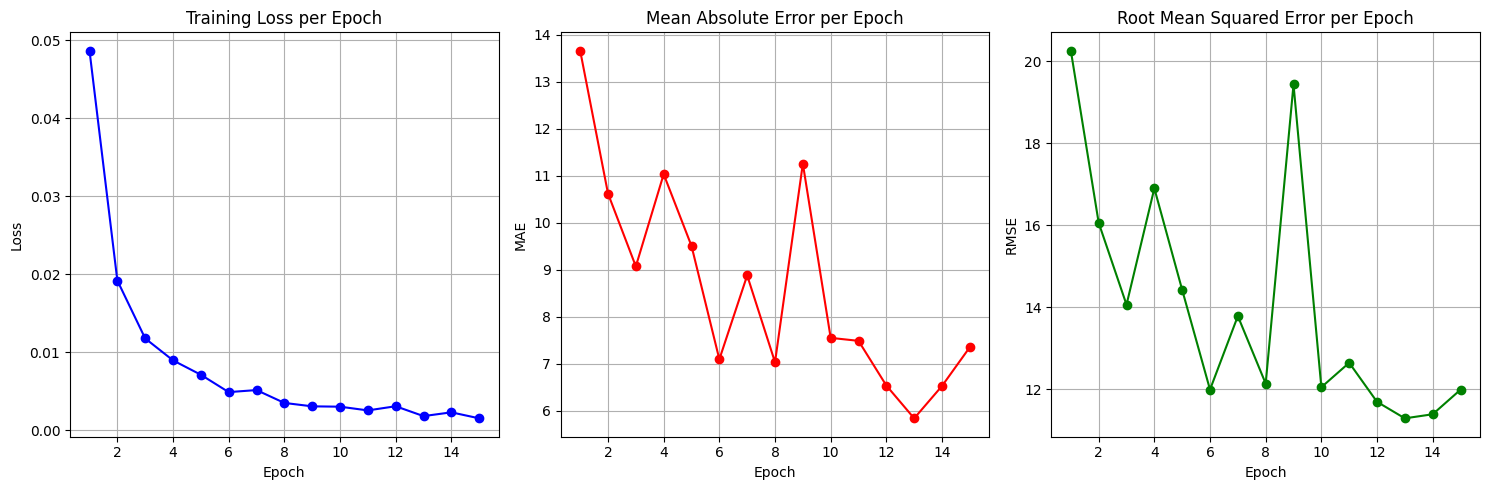

In [24]:
# Plotting the training loss, MAE, and RMSE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 16), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, 16), maes, marker='o', linestyle='-', color='red')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, 16), rmses, marker='o', linestyle='-', color='green')
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()




In [25]:
# Save model to specified path
model_save_path = "D:/trained_models/bert_base_uncased"
tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

In [18]:
# Save model to specified path
model_save_path = "D:/trained_models/bert_base_uncased"
tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

In [5]:
# google-bert/bert-base-uncased

# Sentence Transformer

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
import torch
import numpy as np
from transformers import AdamW, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Initialize tokenizer and model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenization
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert data to PyTorch tensors
train_input_ids = torch.tensor(train_encodings['input_ids']).to(device)
train_attention_mask = torch.tensor(train_encodings['attention_mask']).to(device)
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)

test_input_ids = torch.tensor(test_encodings['input_ids']).to(device)
test_attention_mask = torch.tensor(test_encodings['attention_mask']).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

train_dataset = torch.utils.data.TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = torch.utils.data.TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training with loss tracking
losses = []
maes = []  
rmses = []
model.train()
for epoch in range(20):  
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)
    print(f"Epoch {epoch + 1}: Loss = {average_loss}")

    
    model.eval()
    epoch_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.squeeze(1)
            epoch_predictions.extend(preds.cpu().numpy())

    predictions_scaled = scaler.inverse_transform(np.array(epoch_predictions).reshape(-1, 1)).flatten()
    epoch_mae = mean_absolute_error(test_labels, predictions_scaled)
    epoch_rmse = sqrt(mean_squared_error(test_labels, predictions_scaled))
    maes.append(epoch_mae)
    rmses.append(epoch_rmse)
    model.train() 

# Plotting the training loss, MAE, and RMSE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 13), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, 13), maes, marker='o', linestyle='-', color='red')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, 13), rmses, marker='o', linestyle='-', color='green')
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_sbert = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse_sbert}")

# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


## Sentence BERT with 20 epoch

In [ ]:
import torch
import numpy as np
from transformers import AdamW, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Initialize tokenizer and model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenization
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert data to PyTorch tensors
train_input_ids = torch.tensor(train_encodings['input_ids']).to(device)
train_attention_mask = torch.tensor(train_encodings['attention_mask']).to(device)
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)

test_input_ids = torch.tensor(test_encodings['input_ids']).to(device)
test_attention_mask = torch.tensor(test_encodings['attention_mask']).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

train_dataset = torch.utils.data.TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = torch.utils.data.TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)


losses = []
maes = []  
rmses = [] 
model.train()
for epoch in range(20):  # Adjust number of epochs as needed
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)
    print(f"Epoch {epoch + 1}: Loss = {average_loss}")

    # Evaluate MAE and RMSE at the end of each epoch
    model.eval()
    epoch_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.squeeze(1)
            epoch_predictions.extend(preds.cpu().numpy())

    predictions_scaled = scaler.inverse_transform(np.array(epoch_predictions).reshape(-1, 1)).flatten()
    epoch_mae = mean_absolute_error(test_labels, predictions_scaled)
    epoch_rmse = sqrt(mean_squared_error(test_labels, predictions_scaled))
    maes.append(epoch_mae)
    rmses.append(epoch_rmse)
    model.train() 



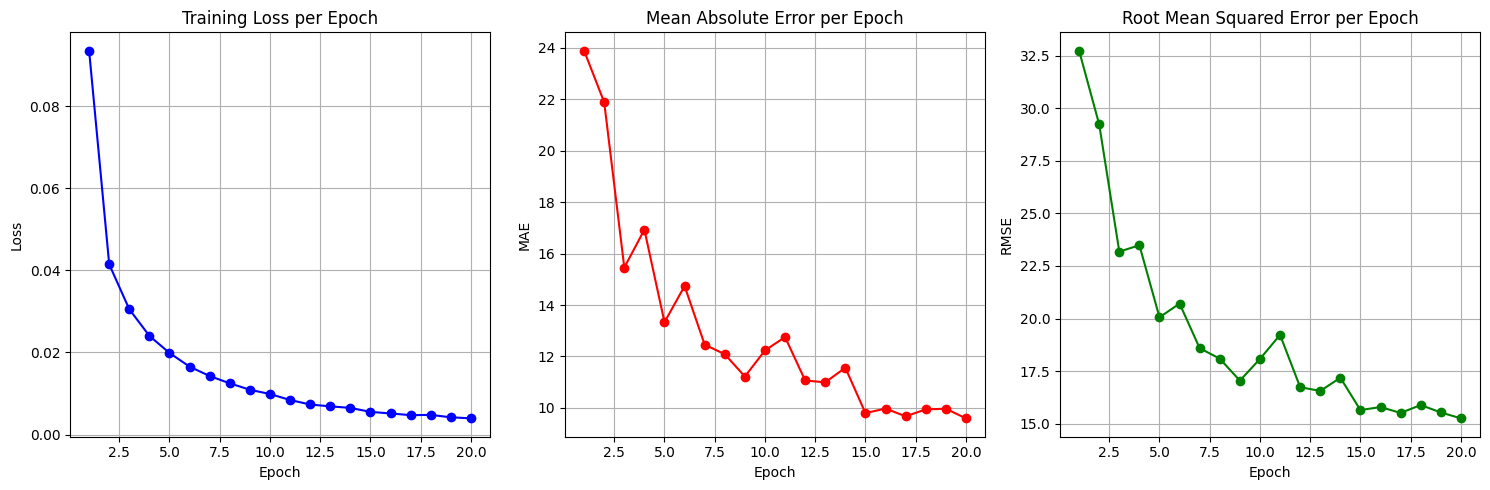

Root Mean Squared Error (RMSE): 15.250355443514803
R-squared (R2): 0.9865602814329273
Mean Absolute Error (MAE): 9.590966128346807


In [20]:
# Plotting the training loss, MAE, and RMSE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 21), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, 21), maes, marker='o', linestyle='-', color='red')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, 21), rmses, marker='o', linestyle='-', color='green')
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_sbert = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse_sbert}")

# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Sentence BERT 30  Epoch

In [ ]:
import torch
import numpy as np
from transformers import AdamW, AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['date'], test_size=0.2, random_state=42
)

# Scale labels
scaler = StandardScaler()
train_labels_scaled = scaler.fit_transform(train_labels.values.reshape(-1, 1)).flatten()
test_labels_scaled = scaler.transform(test_labels.values.reshape(-1, 1)).flatten()

# Initialize tokenizer and model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Tokenization
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True)

# Convert data to PyTorch tensors
train_input_ids = torch.tensor(train_encodings['input_ids']).to(device)
train_attention_mask = torch.tensor(train_encodings['attention_mask']).to(device)
train_labels_tensor = torch.tensor(train_labels_scaled, dtype=torch.float32).to(device)

test_input_ids = torch.tensor(test_encodings['input_ids']).to(device)
test_attention_mask = torch.tensor(test_encodings['attention_mask']).to(device)
test_labels_tensor = torch.tensor(test_labels_scaled, dtype=torch.float32).to(device)

train_dataset = torch.utils.data.TensorDataset(train_input_ids, train_attention_mask, train_labels_tensor)
test_dataset = torch.utils.data.TensorDataset(test_input_ids, test_attention_mask, test_labels_tensor)

# DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=38, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training with loss tracking
losses = []
maes = []  
rmses = [] 
model.train()
for epoch in range(30):  
    epoch_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels.unsqueeze(1))
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)
    print(f"Epoch {epoch + 1}: Loss = {average_loss}")

    # Evaluate MAE and RMSE at the end of each epoch
    model.eval()
    epoch_predictions = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.squeeze(1)
            epoch_predictions.extend(preds.cpu().numpy())

    predictions_scaled = scaler.inverse_transform(np.array(epoch_predictions).reshape(-1, 1)).flatten()
    epoch_mae = mean_absolute_error(test_labels, predictions_scaled)
    epoch_rmse = sqrt(mean_squared_error(test_labels, predictions_scaled))
    maes.append(epoch_mae)
    rmses.append(epoch_rmse)
    model.train()  # Ensure model is back in training mode



In [24]:
model_save_path = "D:/trained_models/sentencebert_regression"
tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

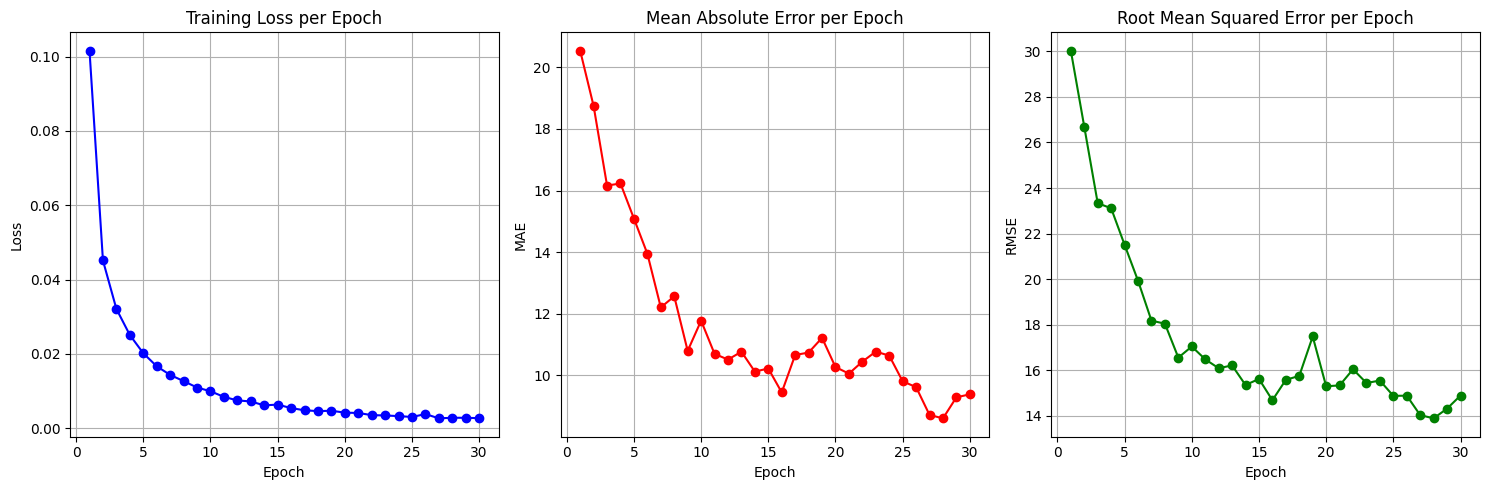

Root Mean Squared Error (RMSE): 14.893802180291694
R-squared (R2): 0.9872064161746075
Mean Absolute Error (MAE): 9.380549531236582


In [23]:
# Plotting the training loss, MAE, and RMSE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 31), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, 31), maes, marker='o', linestyle='-', color='red')
plt.title('Mean Absolute Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, 31), rmses, marker='o', linestyle='-', color='green')
plt.title('Root Mean Squared Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluation
model.eval()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=38, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.squeeze(1)
        predictions.extend(preds.tolist())

# Scale predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

rmse_sbert = sqrt(mean_squared_error(test_labels, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse_sbert}")

# Calculate R-squared (R2)
r_squared = r2_score(test_labels, predictions)
print(f"R-squared (R2): {r_squared}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

#